In [20]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [21]:
x.requires_grad_(True)              #保存跟踪中间的微分值
x.grad

$$ y=2x^2 = 2 * \begin{bmatrix} 0\\ 1\\ 4\\9\\ \end{bmatrix} = \begin{bmatrix} 28 \end{bmatrix}$$ 


In [22]:
y = 2 * torch.dot(x, x)             
y

tensor(28., grad_fn=<MulBackward0>)

$$ y' = 4x

In [23]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [24]:
x.grad == 4*x

tensor([True, True, True, True])

In [35]:
x.grad.zero_()          #清除之前的的累积梯度
y = x.sum()  
y    


tensor(2., grad_fn=<SumBackward0>)

In [27]:
x = torch.rand(3, requires_grad=True)
y = x**2
z = x + x


In [28]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = x**2 + y
z.backward()
print(z, x.grad, y.grad)

tensor(3., grad_fn=<AddBackward0>) tensor(2.) tensor(1.)


## **矩阵算梯度转化为标量**  
https://zhuanlan.zhihu.com/p/83172023
<BR> https://www.bilibili.com/video/BV1ZA411H7BU/?spm_id_from=333.337.search-card.all.click&vd_source=da5a4de0e3cf3c81922e2b9dbcbf0372

 $$ z =  x_1 + x_2 + 4 $$

In [30]:
x = torch.ones(2,requires_grad=True)
z = x + 2
z.sum().backward()                
print(x.grad)

tensor([1., 1.])


In [36]:
x = torch.ones(2,requires_grad=True)
z = x + 2
z.backward(torch.ones_like(z)) # grad_tensors需要与输入tensor大小一致
print(x.grad)

tensor([1., 1.])


In [40]:
x = torch.tensor([2., 1.], requires_grad=True)
y = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)

z = torch.mm(x.view(1, 2), y)
print(f"z:{z}")
z.backward(torch.Tensor([[1., 0]]), retain_graph=True)
print(f"x.grad: {x.grad}")
print(f"y.grad: {y.grad}")

z:tensor([[5., 8.]], grad_fn=<MmBackward0>)
x.grad: tensor([1., 3.])
y.grad: tensor([[2., 0.],
        [1., 0.]])


In [41]:
x.grad.zero_()
y = x*x
u = y.detach()          #将y解套，即只求z对x的梯度，将y视为常数
z = u*x

z.sum().backward()
x.grad == u 


tensor([True, True])

In [42]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True])

In [43]:
def f(a):
    b = a * 2
    while b.norm()<1000:
        b = b*2
    if b.sum()>0:
        c = b
    else:
        c = 100*b
    return c

In [48]:
a = torch.randn(size=(), requires_grad=True)       # size=()：表示是一个标量 require_grad=True：表示需要梯度
print(a)
d = f(a)
d.backward()


tensor(0.5682, requires_grad=True)


In [45]:
a.grad == d / a

tensor(True)

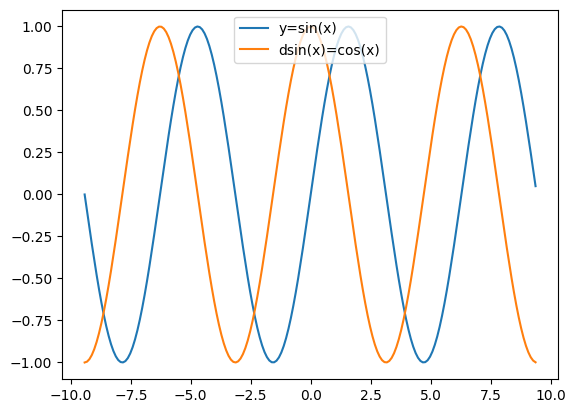

In [55]:
import torch
import matplotlib.pyplot as plt
import numpy as np
x = torch.arange(-3*np.pi, 3*np.pi, 0.1,requires_grad=True)     #从-3Π到3Π
y = torch.sin(x)

y.sum().backward()

plt.plot(x.detach(), y.detach(), label='y=sin(x)')      #不能对将要grad的张量调用numpy()，应用tensor.detach().numpy()来代替
plt.plot(x.detach(), x.grad, label='dsin(x)=cos(x)') 
plt.legend(loc='upper center')                          #图例位置
plt.show()
